<h1><b>Análise Exploratória de Dados</b><br>
<i>Diabetes Health Indicators</i></h1>

<b>O conjunto de dados contém as seguintes variáveis:</b><br><i>
<b>gender:</b> Gênero da pessoa.<br>
<b>age:</b> Idade da pessoa.<br>
<b>hypertension:</b> Indica se a pessoa tem hipertensão.<br>
<b>heart_disease:</b> Indica se a pessoa tem alguma doença cardíaca conhecida.<br>
<b>smoking_history:</b> Histórico de tabagismo da pessoa.<br>
<b>bmi:</b> Índice de massa corporal.<br>
<b>HbA1c_level:</b> Nível de hemoglobina glicada — Média de glicose no sangue nos últimos meses<br>
<b>blood_glucose_level:</b> Glicose sanguínea.<br>
<b>diabetes:</b> Se a pessoa foi diagnosticada com diabetes ou não.<br></i>

### Importação das Bibliotecas

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys

Configurações de estilo para os gráficos

In [19]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'utils')))

from plot_config import set_seaborn
set_seaborn()

### Importação e pré-visualização dos dados

In [20]:
df = pd.read_csv("./../../data/raw/diabetes.csv")
pd.options.display.float_format = '{:.2f}'.format

display(df.head())
registros = df.shape[0]
print(f"\n{registros} registros e {df.shape[1]} variáveis")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0



100000 registros e 9 variáveis


### Quantidade de dados nulos

In [21]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Tipos de dados

In [22]:
df.dtypes

gender                     str
age                    float64
hypertension             int64
heart_disease            int64
smoking_history            str
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

### Análise das variáveis categóricas
Categorias em cada variável

In [23]:
for i in df.select_dtypes(include="str").columns:
  print(f"{i}: {df[i].unique()}")

gender: <StringArray>
['Female', 'Male', 'Other']
Length: 3, dtype: str
smoking_history: <StringArray>
['never', 'No Info', 'current', 'former', 'ever', 'not current']
Length: 6, dtype: str


Quantidade de dados de cada categoria

In [24]:
df["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [25]:
df["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

Proporção de dados da categoria "No Info" em "smoking_history"

In [26]:
no_info = df["smoking_history"][df["smoking_history"] == "No Info"].count()
print(f"Porcentagem de dados sem informação em smoking_history: {round((no_info / df.shape[0]) * 100)}%")

Porcentagem de dados sem informação em smoking_history: 36%


In [27]:
df.groupby("smoking_history")["diabetes"].mean()

smoking_history
No Info       0.04
current       0.10
ever          0.12
former        0.17
never         0.10
not current   0.11
Name: diabetes, dtype: float64

### Análise de Outilies

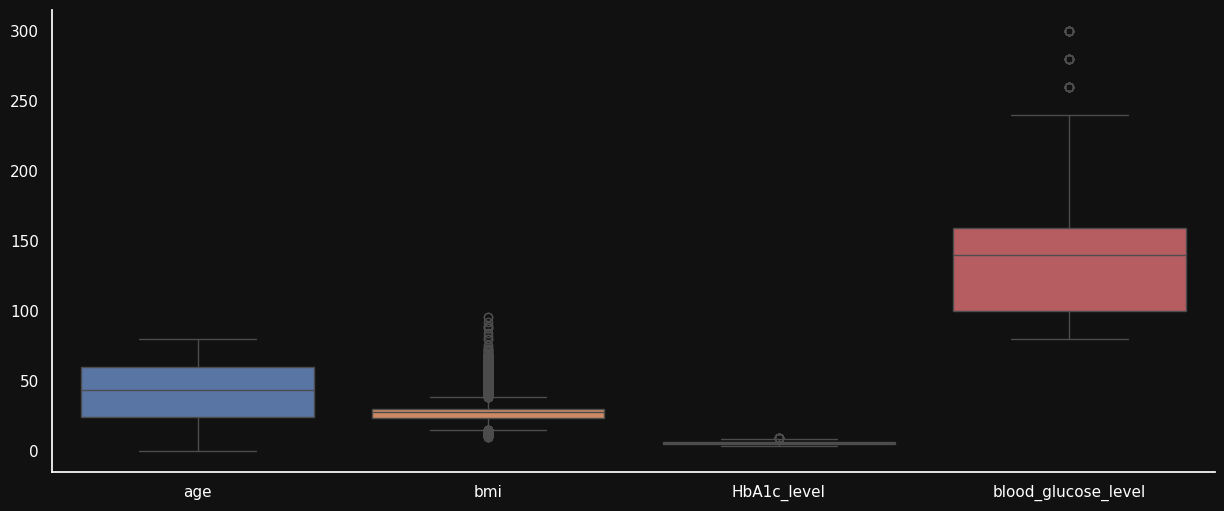

In [31]:
numericas = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]

sns.boxplot(df[numericas]);

Regra do 1,5 × Distância Interquartílica para identificação de Outlires

In [32]:
for i in df[numericas].columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  outliers_iqr = df[(df[i] < limite_inferior) | (df[i] > limite_superior)]

  print(f"Mínimo da variável '{i}' = {df[i].min()}\nMáximo da variável '{i}' = {df[i].max()}")
  print(f"Limites da variável '{i}' = {round(limite_inferior, 2)} a {round(limite_superior, 2)}")
  print(f"Outliers da variável '{i}' = {outliers_iqr[i].unique()}\n")

Mínimo da variável 'age' = 0.08
Máximo da variável 'age' = 80.0
Limites da variável 'age' = -30.0 a 114.0
Outliers da variável 'age' = []

Mínimo da variável 'bmi' = 10.01
Máximo da variável 'bmi' = 95.69
Limites da variável 'bmi' = 14.7 a 38.5
Outliers da variável 'bmi' = [54.7  13.99 56.43 ... 59.42 44.39 60.52]

Mínimo da variável 'HbA1c_level' = 3.5
Máximo da variável 'HbA1c_level' = 9.0
Limites da variável 'HbA1c_level' = 2.7 a 8.3
Outliers da variável 'HbA1c_level' = [9.  8.8]

Mínimo da variável 'blood_glucose_level' = 80
Máximo da variável 'blood_glucose_level' = 300
Limites da variável 'blood_glucose_level' = 11.5 a 247.5
Outliers da variável 'blood_glucose_level' = [260 300 280]



Valores que podem ser considerados outliers para cada variável aplicando o contexto clínico:<br>
age → valores muito baixos (crianças) ou muito altos (120 anos).<br>
bmi → valores < 10 ou > 70 geralmente são outliers.<br>
HbA1c_level → acima de 15 já é raro.<br>
blood_glucose_level → valores > 300–400 podem ser extremos.

In [33]:
df_without_outlier = df[(df["age"] > 17) & (df["bmi"].between(10, 70))]

print(f"Ao remover os outliers temos uma perda de {registros - df_without_outlier.shape[0]} registros")
print(f"Que representam {round(100 - ((df_without_outlier.shape[0] / registros) * 100), 2)}% dos dados")
print(f"Gerando uma amostra com {df_without_outlier.shape[0]} registros e {df_without_outlier.shape[1]} variáveis")

Ao remover os outliers temos uma perda de 17236 registros
Que representam 17.24% dos dados
Gerando uma amostra com 82764 registros e 10 variáveis


Na análise exploratória, foi detectado que 17,2% dos registros estavam fora dos limites de idade definidos (menores de 18 anos).
Como a exclusão dessa quantidade representa uma perda significativa de informação, será criado um dataframe com a variável 'outlier_age' que explica esses outliers sem retira-los para testes alternativos.

In [34]:
df_outlier_age = df.copy()
df_outlier_age = df_outlier_age[df_outlier_age["bmi"].between(10, 70)]
df_outlier_age["outlier_age"] = np.where(df_outlier_age["age"] < 18, 1, 0)

print(f"Ao remover os outliers temos uma perda de {registros - df_outlier_age.shape[0]} registros")
print(f"Que representam {round(100 - ((df_outlier_age.shape[0] / registros) * 100), 2)}% dos dados")
print(f"Gerando uma amostra com {df_outlier_age.shape[0]} registros e {df_outlier_age.shape[1]} variáveis")

Ao remover os outliers temos uma perda de 19 registros
Que representam 0.02% dos dados
Gerando uma amostra com 99981 registros e 11 variáveis


### Proporção de dados na variável alvo

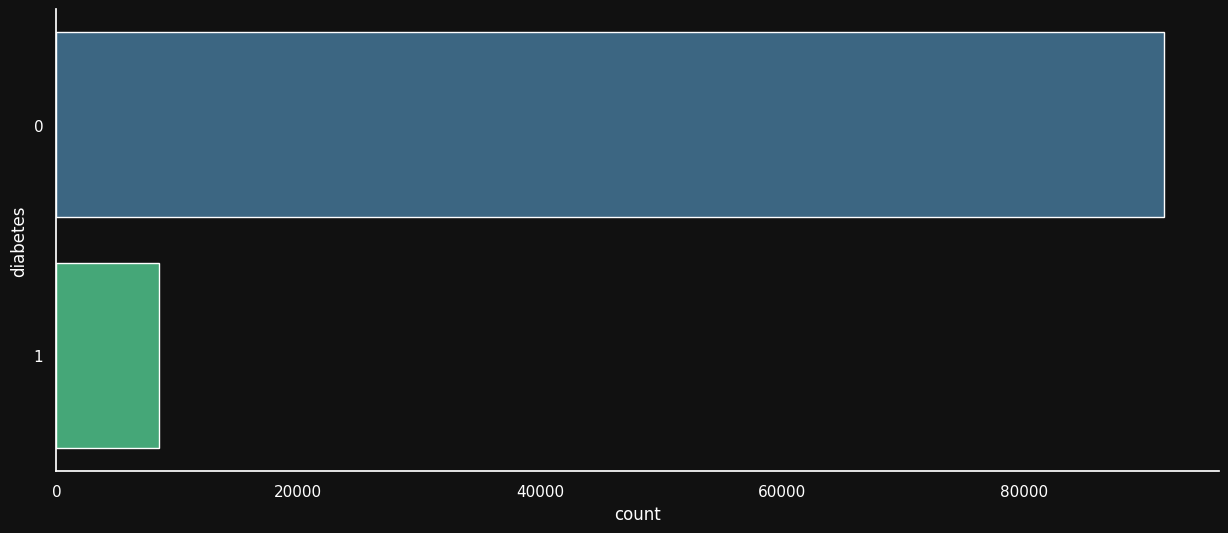

In [35]:
sns.countplot(y=df["diabetes"], palette="viridis", hue=df["diabetes"], legend=False);

In [36]:
proportion_diabetes = df["diabetes"].value_counts(normalize=True)
count_diabetes = df["diabetes"].value_counts()

print(f"Quantidade de dados com pacientes negativo para diabetes: {count_diabetes[0]}")
print(f"Quantidade de dados com pacientes positivo para diabetes: {count_diabetes[1]}\n")

print(f"Proporção de negativos para diabetes: {float(proportion_diabetes[0])}")
print(f"Proporção de positivos para diabetes: {float(proportion_diabetes[1])}\n")

if float(proportion_diabetes[0]) < 0.35 or float(proportion_diabetes[1]) < 0.35:
    print("Dados desbalanceados.")
else:
    print("Perfeito!\nDados balanceados.")

Quantidade de dados com pacientes negativo para diabetes: 91500
Quantidade de dados com pacientes positivo para diabetes: 8500

Proporção de negativos para diabetes: 0.915
Proporção de positivos para diabetes: 0.085

Dados desbalanceados.
